In [1]:
from scripts.ClusterTS_MDS import ClusterVTECDataMDS
from numpy import loadtxt, float64

In [2]:
PTEX_dissim = loadtxt("./data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

In [3]:
MDS_methods = ("SMACOF-Dissim", "SMACOF-Dissim-Classic")
cluster_methods = ("K-Means", "Gaussian")
number_dims = tuple(range(2, 4))
number_clusters = tuple(range(2, 11))

TEC_ClusterSeries = ClusterVTECDataMDS(dissimilarity = PTEX_dissim)

metrics_SMACOF_DTW_results = dict()
metrics_SMACOF_DTW_Classic_results = dict()

In [4]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def GetClusteringMetrics(Xc, num_clusters, cluster_method = "K-Means"):
    if cluster_method == "K-Means":
        KMeans_Cluster_TS = KMeans(n_clusters = num_clusters, init = "k-means++")
        Labels = KMeans_Cluster_TS.fit_predict(Xc)
        
    elif cluster_method == "Gaussian":
        GaussianMix_Cluster_TS = GaussianMixture(n_components = num_clusters, covariance_type = "full")
        Labels = GaussianMix_Cluster_TS.fit_predict(Xc)

    SH_score_Xc = silhouette_score(Xc, Labels)
    CH_score_Xc = calinski_harabasz_score(Xc, Labels)
    DB_score_Xc = davies_bouldin_score(Xc, Labels)

    return {"Silhouette": SH_score_Xc, "Calinski–Harabasz ": CH_score_Xc, "Davies-Boulding":DB_score_Xc}

## SMACOF-DTW y SMACOF-DTW inicializado con clásico

SMACOF-Dissim with 2 components has a stress value of 0.123055
--Scores with K-Means clustering--
SH coefficient = 0.6401045303968576
CH index = 8684.755596951389
DB index = 0.5586863136780794
--Total series for every cluster--
0 -> 2427
1 -> 2485
--Scores with K-Means clustering--
SH coefficient = 0.6985523278789125
CH index = 13340.004280793766
DB index = 0.4727362090753475
--Total series for every cluster--
0 -> 678
1 -> 2471
2 -> 1763
--Scores with K-Means clustering--
SH coefficient = 0.5899185342018798
CH index = 11071.540849864763
DB index = 0.6110765306477449
--Total series for every cluster--
0 -> 674
1 -> 1830
2 -> 1741
3 -> 667
--Scores with K-Means clustering--
SH coefficient = 0.5816130569338885
CH index = 9298.069274872136
DB index = 0.7269453459047149
--Total series for every cluster--
0 -> 1741
1 -> 1821
2 -> 77
3 -> 607
4 -> 666
--Scores with K-Means clustering--
SH coefficient = 0.5460081547388407
CH index = 8782.809515723126
DB index = 0.8753784589388075
--Total seri

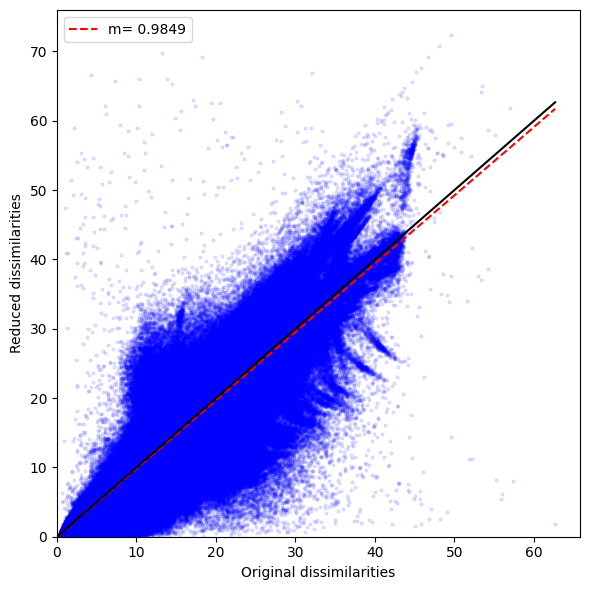

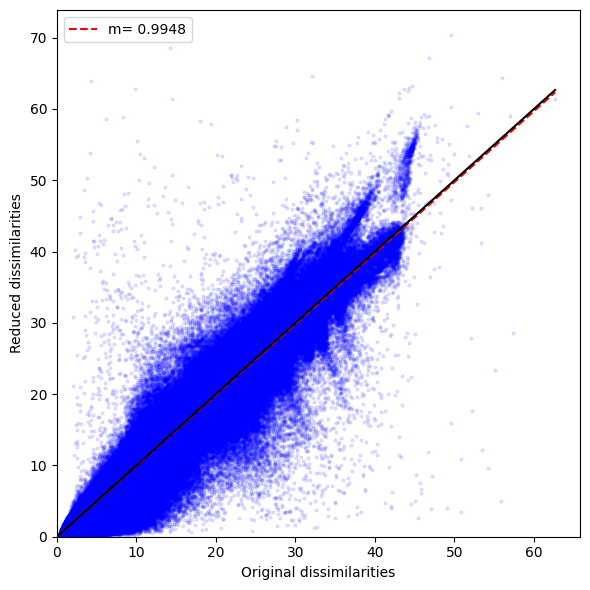

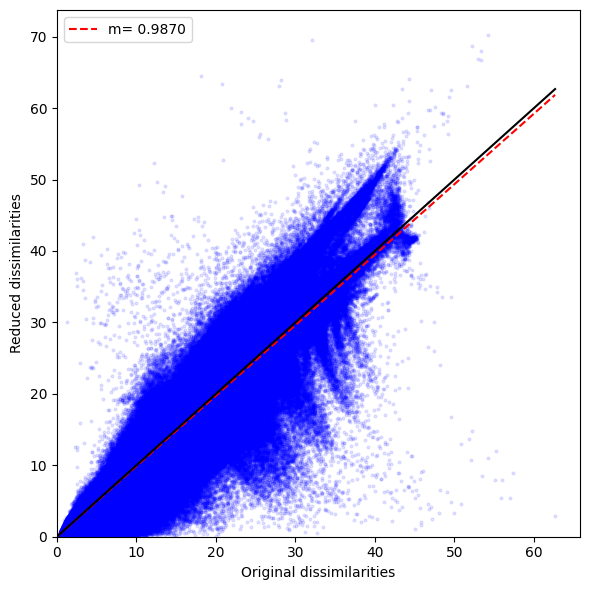

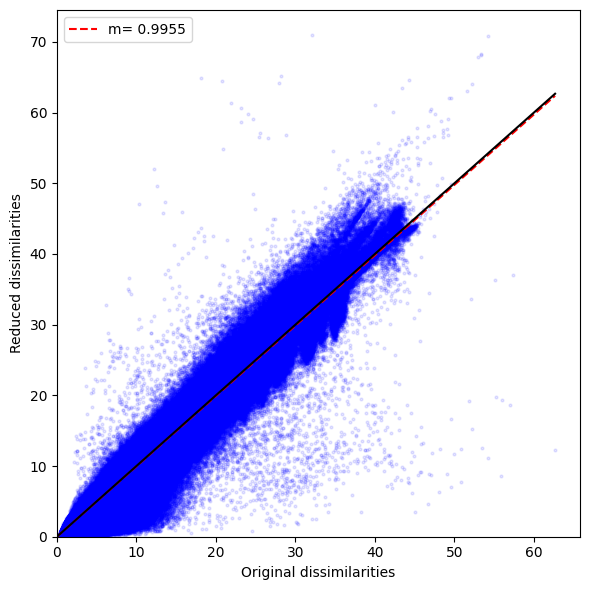

In [5]:
for MDS_method in MDS_methods:
    for num_dims in number_dims:
        TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dims, method = MDS_method)

        for cluster_method in cluster_methods:
            for num_cluster in number_clusters:
                TEC_ClusterSeries.ClusterTSVectors(num_clusters = num_cluster, cluster_method = cluster_method)
                cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, cluster_method)
                
                if MDS_method == MDS_methods[0]:
                    metrics_SMACOF_DTW_results[cluster_method + f"-{num_dims}-{num_cluster}"] = cluster_metrics
                else:
                    metrics_SMACOF_DTW_Classic_results[cluster_method + f"-{num_dims}-{num_cluster}"] = cluster_metrics

## Metricas de evaluación

In [6]:
from pandas import DataFrame

# Function to highlight min and max values within a block of N rows
def highlight_min_max(df_block):
    # Find min and max per column within the block
    min_vals = df_block.min()
    max_vals = df_block.max()

    # Create a DataFrame for styling with empty strings
    df_style = DataFrame('', index=df_block.index, columns=df_block.columns)

    # Apply the styles
    df_style[df_block == min_vals] = 'background-color: blue'  # Min
    df_style[df_block == max_vals] = 'background-color: red'  # Max

    return df_style

# Function to apply highlighting for blocks of N rows
def apply_highlight_in_blocks(df, N):
    # Create an empty DataFrame for styling
    style_df = DataFrame('', index=df.index, columns=df.columns)

    # Split DataFrame into blocks of N rows and apply highlight_min_max to each block
    for start in range(0, len(df), N):
        end = start + N
        block = df.iloc[start:end]
        
        # Apply the highlighting function to each block and assign it to the style DataFrame
        style_df.iloc[start:end] = highlight_min_max(block)

    return df.style.apply(lambda _: style_df, axis=None)

In [9]:
num_row_sep = len(number_clusters)

print("Metrics with DTW")
metrics_DTW_results = DataFrame(metrics_SMACOF_DTW_results)
styled_metrics_DTW = apply_highlight_in_blocks(metrics_DTW_results.T, num_row_sep)
styled_metrics_DTW

Metrics with DTW


,Silhouette,Calinski–Harabasz,Davies-Boulding
K-Means-2-2,0.640105,8684.755597,0.558686
K-Means-2-3,0.698552,13340.004281,0.472736
K-Means-2-4,0.627075,11867.465364,0.632013
K-Means-2-5,0.532230,8805.336842,0.759745
K-Means-2-6,0.517554,10666.134952,0.830623
K-Means-2-7,0.528457,10242.518793,0.730104
K-Means-2-8,0.471786,9739.193488,0.869189
K-Means-2-9,0.500831,9813.180370,0.770988
K-Means-2-10,0.477479,9729.218927,0.798867
Gaussian-2-2,0.572917,6379.250709,0.584528


In [10]:
print("Metrics with DTW-Classic")
metrics_DTW_Classic_results = DataFrame(metrics_SMACOF_DTW_Classic_results)
styled_metrics_DTW_Classic = apply_highlight_in_blocks(metrics_DTW_Classic_results.T, num_row_sep)
styled_metrics_DTW_Classic

Metrics with DTW-Classic


,Silhouette,Calinski–Harabasz,Davies-Boulding
K-Means-2-2,0.638983,8595.889991,0.556274
K-Means-2-3,0.694568,12655.530872,0.466367
K-Means-2-4,0.644626,12069.509674,0.617573
K-Means-2-5,0.619956,10533.387622,0.623478
K-Means-2-6,0.529601,11553.938523,0.708131
K-Means-2-7,0.510035,11072.416189,0.765242
K-Means-2-8,0.441354,10196.739519,0.824855
K-Means-2-9,0.474976,9979.507970,0.840687
K-Means-2-10,0.422238,10075.572696,0.871149
Gaussian-2-2,0.581596,6587.429279,0.576557
